In [9]:


import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Method: Used to compute the sigmoid activation value
def sigmoid_activation(x):
    """
    :param x: Feature matrix
    :return: Predictions matrix
    """
    return 1.0 / (1 + np.exp(-x))


# Method: Used to obtain a set of predictions
def predict(x, w):
    """
    :param x: Feature matrix
    :param w: Weights matrix
    :return: Predictions matrix
    """
    # Take the dot product between the features and weight matrices to get the prediction matrix
    predictions = sigmoid_activation(x.dot(w))

    # Apply a step function threshold for the binary outputs
    predictions[predictions <= 0.5] = 0
    predictions[predictions > 0] = 1

    return predictions


# Method: Used to get the next 'mini-batch' of data
def next_batch(x, y, batch_size):
    """
    :param x: Feature matrix
    :param y: Class matrix
    :param batch_size: Batch size
    :return: Subsets of x and y as mini-batches
    """
    # Loop over our data in 'mini-batches' yielding a tuple of the current batched data
    for i in np.arange(0, x.shape[0], batch_size):
        yield (x[i:i + batch_size], y[i:i + batch_size])




# Generate a 2-class 2D classification problem with 1,000 data points
(x, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0]), 1)

# Insert a column of 1's as the last entry of the feature matrix (bias trick)
x = np.c_[x, np.ones((x.shape[0]))]
print(x.shape[0])

# Split the data into training (50%) and testing (50%)
(train_x, test_x, train_y, test_y) = train_test_split(x, y, test_size=0.5, random_state=42)

# Initialize the weight matrix and list of losses
print('[INFO]: Training....')
w = np.random.randn(x.shape[1], 1)
losses = []

# Loop for the number of epochs
for epoch in np.arange(0, 1000):
    # Initialize the total loss for each epoch
    epoch_loss = []

    for (batch_x, batch_y) in next_batch(x, y, 32):
        # Take the dot product between the current batch features and the weight matrix to get the predictions matrix
        predictions = sigmoid_activation(batch_x.dot(w))
        #print(predictions)

        # Compute the error between the predictions and true values
        error = predictions - batch_y
        epoch_loss.append(np.sum(error ** 2))

        # Compute the gradient (dot product between the current batch features and prediction errors)
        gradient = batch_x.T.dot(error)

        # Update the weight matrix by 'nudging' it in the negative direction
        w += - 0.01* gradient

    # Update the loss history by averaging the loss over each batch
    loss = np.average(epoch_loss)
    losses.append(loss)

    # Check to see if an update should be displayed
    if epoch == 0 or (epoch+1) % 5 == 0:
        print('[INFO]: epoch={}, loss={:.4f}'.format(int(epoch + 1), loss))

1000
[INFO]: Training....
3
[[-0.17600426]
 [-0.45406382]
 [-1.89831002]]
[INFO]: epoch=1, loss=0.0716
[INFO]: epoch=5, loss=0.0123
[INFO]: epoch=10, loss=0.0086
[INFO]: epoch=15, loss=0.0070
[INFO]: epoch=20, loss=0.0061
[INFO]: epoch=25, loss=0.0055
[INFO]: epoch=30, loss=0.0050
[INFO]: epoch=35, loss=0.0046
[INFO]: epoch=40, loss=0.0043
[INFO]: epoch=45, loss=0.0040
[INFO]: epoch=50, loss=0.0038
[INFO]: epoch=55, loss=0.0036
[INFO]: epoch=60, loss=0.0034
[INFO]: epoch=65, loss=0.0032
[INFO]: epoch=70, loss=0.0031
[INFO]: epoch=75, loss=0.0030
[INFO]: epoch=80, loss=0.0028
[INFO]: epoch=85, loss=0.0027
[INFO]: epoch=90, loss=0.0026
[INFO]: epoch=95, loss=0.0025
[INFO]: epoch=100, loss=0.0024
[INFO]: epoch=105, loss=0.0024
[INFO]: epoch=110, loss=0.0023
[INFO]: epoch=115, loss=0.0022
[INFO]: epoch=120, loss=0.0021
[INFO]: epoch=125, loss=0.0021
[INFO]: epoch=130, loss=0.0020
[INFO]: epoch=135, loss=0.0020
[INFO]: epoch=140, loss=0.0019
[INFO]: epoch=145, loss=0.0018
[INFO]: epoch=150,

[INFO]: Evaluating....
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



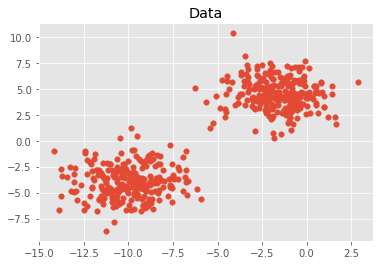

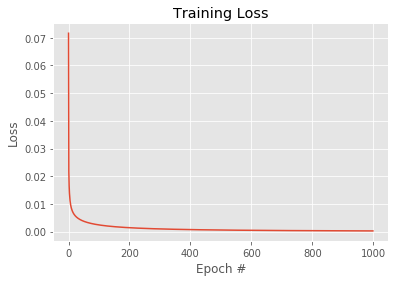

In [20]:
print('[INFO]: Evaluating....')
predictions = predict(test_x, w)
print(classification_report(test_y, predictions))

# Plot the classification (test) data
plt.style.use('ggplot')
plt.figure()
plt.title('Data')
plt.scatter(test_x[:, 0], test_x[:, 1], marker='o', s=30)

# Plot the loss over time
plt.style.use('ggplot')
plt.figure()
plt.title('Training Loss')
plt.plot(np.arange(0, 1000), losses)
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.show()